In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:

kd_col = pd.read_csv("F:\Packt\Project - jional\data\kdd99_columns.csv")
kdd = pd.read_csv('F:\Packt\Project - jional\data\kddcupdatacorrected.csv' , names = kd_col.Column1)

In [7]:
display(kdd.isna().sum())
kdd = kdd.dropna()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<AxesSubplot:>

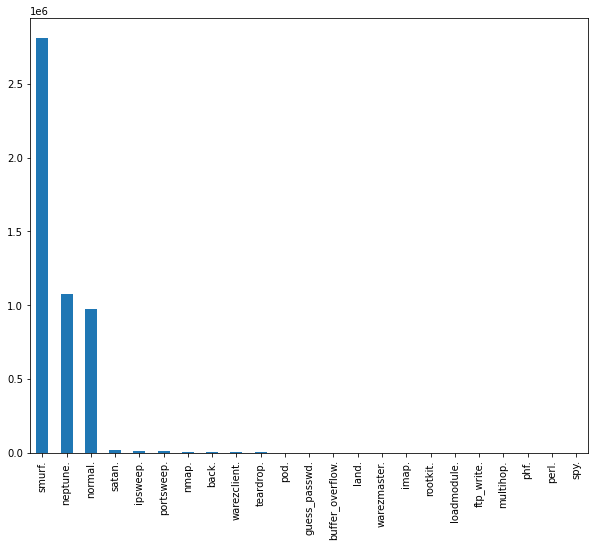

In [162]:
kdd.type.value_counts().plot(kind = 'bar', figsize = (10,8))

In [10]:
cat_var = kdd.select_dtypes('object').columns
num_var = kdd.select_dtypes(np.number).columns

<AxesSubplot:>

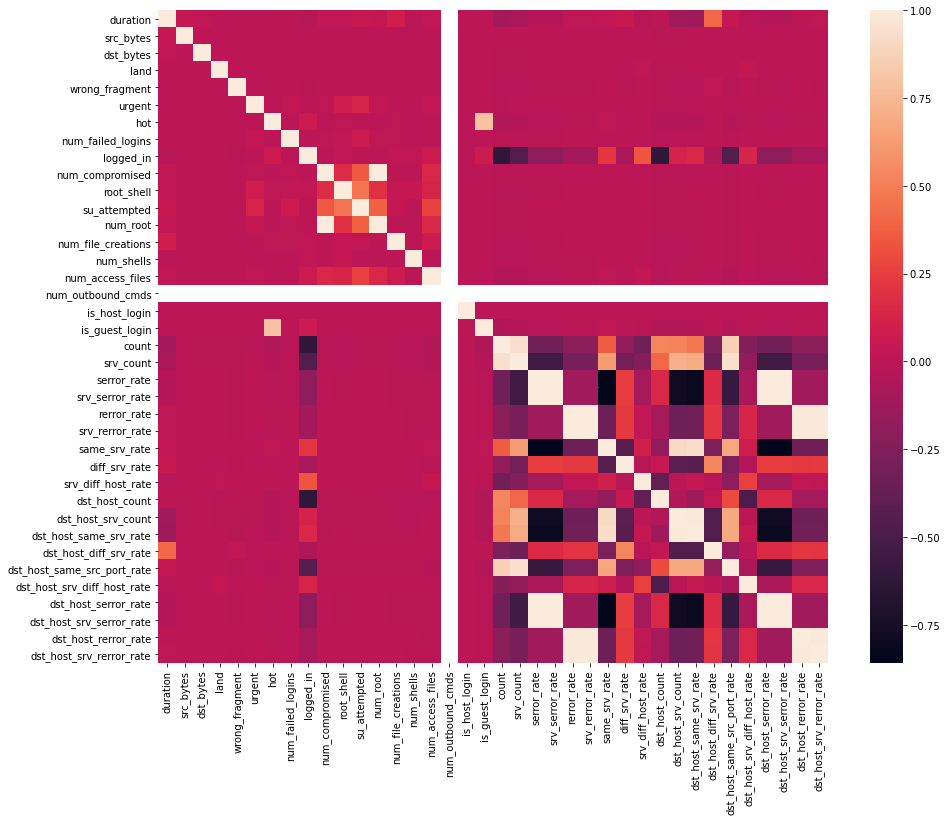

In [11]:
cor = kdd.select_dtypes(np.number).corr()
fg,ax = plt.subplots(figsize = (15,12) )
sns.heatmap(cor, ax = ax)

In [61]:
kdd['status'] = 'non-threat'
kdd['status'].loc[kdd.type != 'normal.'] = 'threat'

D:\programs\python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:ylabel='status'>

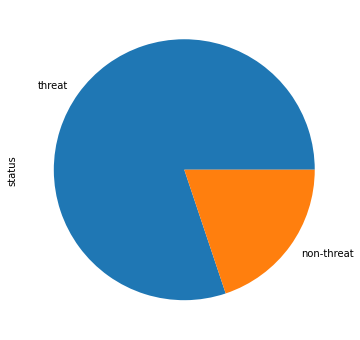

In [63]:
kdd.status.value_counts().plot(kind = 'pie', figsize = (8,6))

# under representation of non-threat status perhaps undersampling/oversampling techniques could help 

<AxesSubplot:>

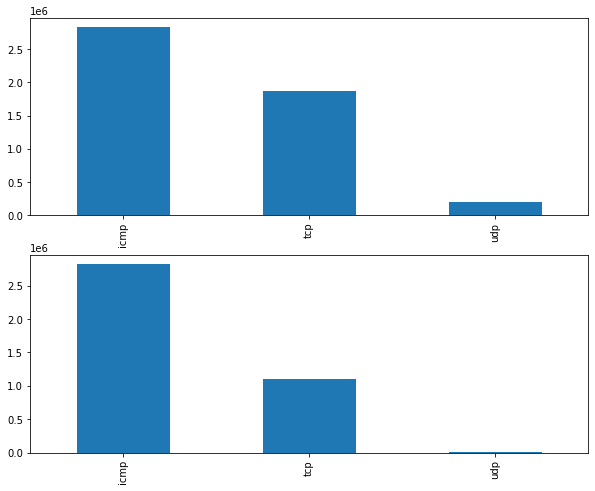

In [78]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
kdd.protocol_type.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.status == 'threat'].protocol_type.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[1])

<AxesSubplot:ylabel='status'>

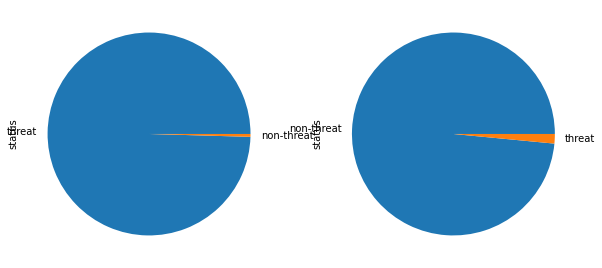

In [90]:
fig, axs = plt.subplots(1 ,2, figsize = (10,8))
kdd.loc[kdd.protocol_type == 'icmp'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.protocol_type == 'udp'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1])
# most of protocol type icmp are threats 

<AxesSubplot:>

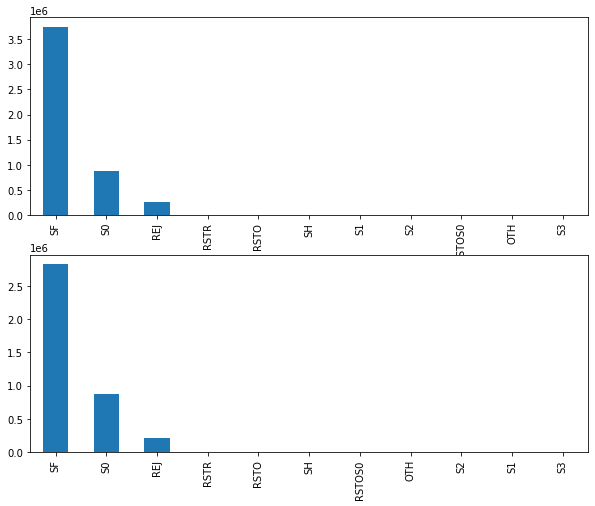

In [80]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
kdd.flag.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.status == 'threat'].flag.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[1])


<AxesSubplot:ylabel='status'>

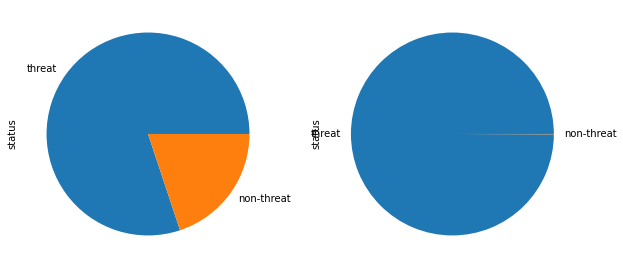

In [100]:
fig, axs = plt.subplots(1 ,2, figsize = (10,8))
kdd.loc[kdd.flag == 'REJ'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.flag == 'S0'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1])



<AxesSubplot:>

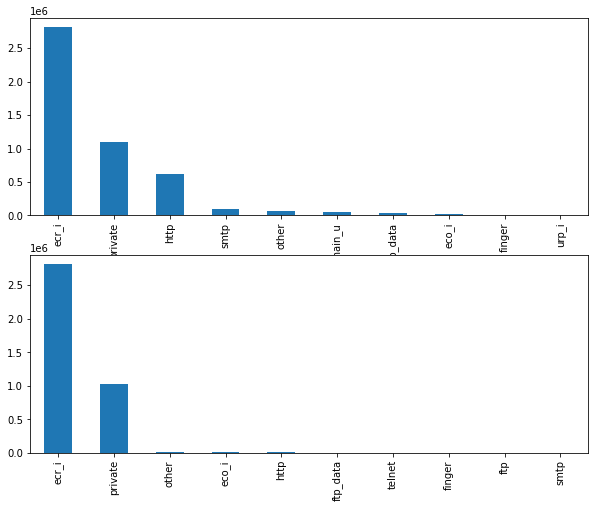

In [140]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
kdd.service.value_counts()[:10].plot(kind = 'bar', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.status == 'threat'].service.value_counts()[:10].plot(kind = 'bar', figsize = (10,8), ax = axs[1])


<AxesSubplot:ylabel='status'>

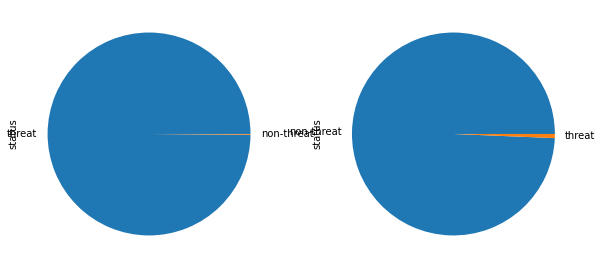

In [98]:
fig, axs = plt.subplots(1 ,2, figsize = (10,8))
kdd.loc[kdd.service == 'ecr_i'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0])
kdd.loc[kdd.service == 'http'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1])

#most of the http seem to be non threat

S1     99.248120
S2     95.031056
S3     92.000000
SF     24.495931
OTH    22.807018
Name: pert, dtype: float64

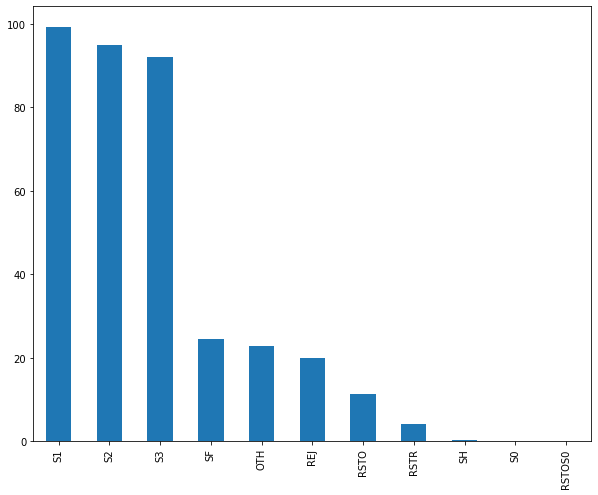

In [152]:
def plot_pert(feat):
    d1 = kdd.loc[kdd.type == 'normal.'][feat].value_counts()
    d2 = kdd[feat].value_counts()
    df = pd.concat([d1,d2], axis= 1)
    df['pert'] = df.iloc[:,0]/df.iloc[:,1]*100
    df = df.sort_values(by ='pert',ascending=False)
    df.pert.plot(kind = 'bar', figsize = (10,8))
    display(df.pert.head(5))
    return 

plot_pert('flag')


urh_i       100.000000
tftp_u      100.000000
ntp_u       100.000000
red_i       100.000000
domain_u     99.984424
Name: pert, dtype: float64

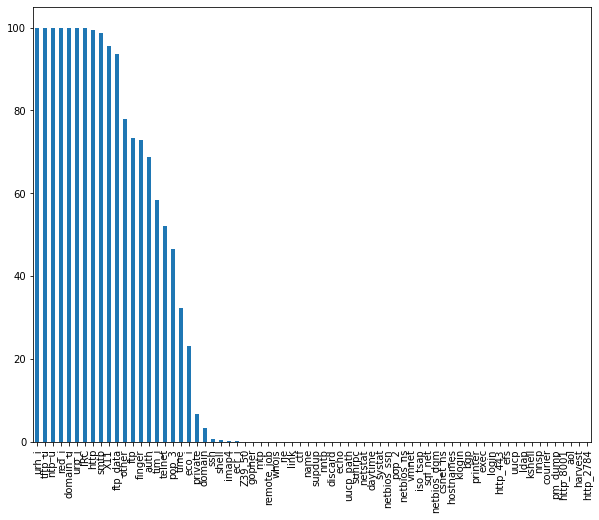

In [153]:
plot_pert('service')

udp     98.486783
tcp     41.092207
icmp     0.450425
Name: pert, dtype: float64

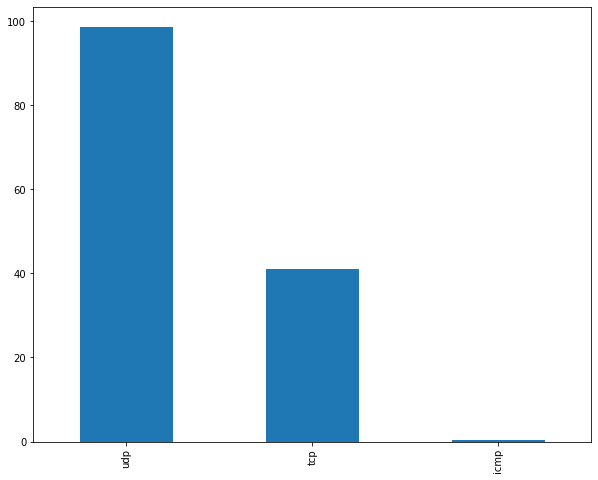

In [154]:
plot_pert('protocol_type')

1    99.519676
0     6.509352
Name: pert, dtype: float64

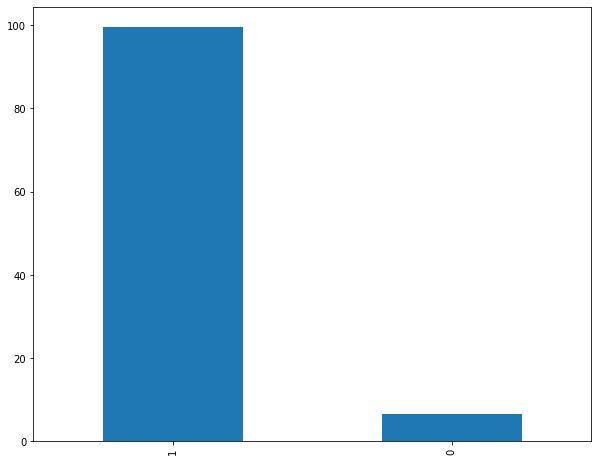

In [155]:
plot_pert('logged_in')

1    98.587571
2    40.000000
0    19.853322
Name: pert, dtype: float64

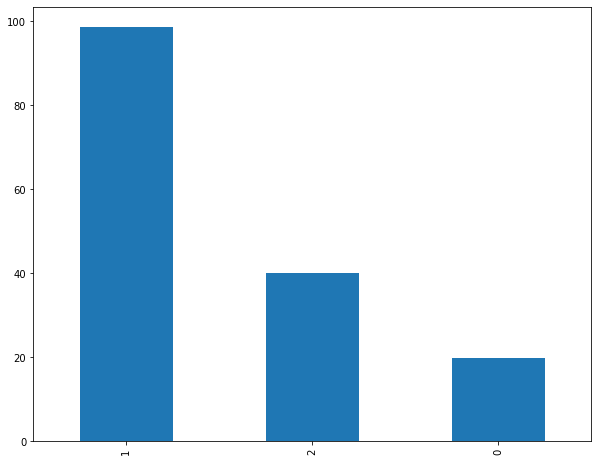

In [175]:
plot_pert('num_shells')


D:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_compromised'>

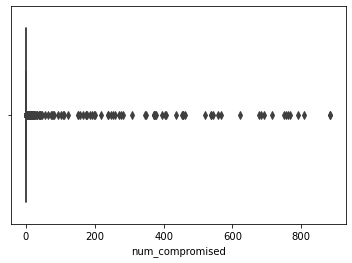

In [183]:
sns.boxplot(kdd['num_compromised'].loc[kdd['num_compromised']<1000])

D:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_file_creations'>

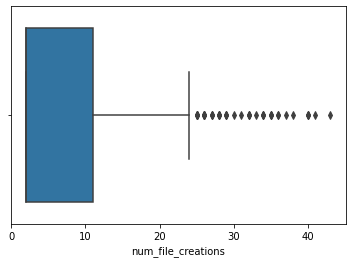

In [186]:
sns.boxplot(kdd['num_file_creations'].loc[kdd['num_file_creations']>1])
# kdd['num_file_creations'].value_counts()

D:\programs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

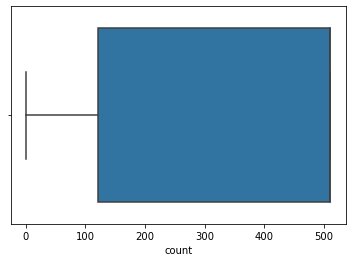

In [187]:
sns.boxplot(kdd['count'])

In [169]:
kdd['nsl'] = np.log1p(kdd['num_shells'])

<AxesSubplot:xlabel='num_compromised', ylabel='status'>

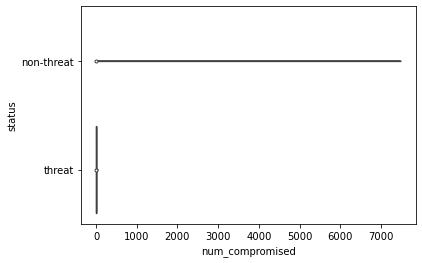

In [177]:
sns.violinplot(data=kdd, x="num_compromised", y="status")

<AxesSubplot:xlabel='count', ylabel='Density'>

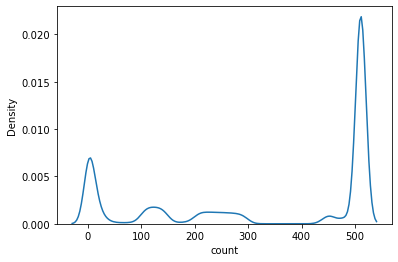

In [22]:
sns.kdeplot(x = kdd['count'])